In [2]:
import re

import pandas as pd
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter


chars_to_remove = ['.', '-', '(',    ')', '@', '/']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 100)

Necessário excluir as 2 últimas linhas do arquivo para evitar 2 linhas nulas. das bases de 2009 até 2011.
A base de 2018 possui algumas colunas 'nome fantasia' que possuem ';' como separador de empresas e que
consequentemente atrapalham na leitura dos dados pois alteram a quantidade de colunas finais.
Sendo necessário a modificação por linha manual (18 linhas no total)

In [3]:
rec2009 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2009.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2010 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2010.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2011 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2011.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2012 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2012.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2013 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2013.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2014 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2014.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2015 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2015.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2016 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2016_v2.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2017 = pd.read_csv("../data/CNRF_2017.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2018 = pd.read_csv("../data/CNRF2018.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")

In [4]:
rec2009 = rec2009.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radical": "RadicalCNPJ"})


In [5]:
rec2010 = rec2010.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radicalCNPJ": "RadicalCNPJ"})

In [6]:
rec2011 = rec2011.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radicalCNPJ": "RadicalCNPJ"})

In [7]:
rec2012.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [8]:
rec2013.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [9]:
rec2014.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [10]:
rec2015.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [11]:
rec2016.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [12]:
rec2017.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [13]:
rec2018.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [14]:
frames = [rec2009,rec2010,rec2011,rec2012,rec2013,rec2014,rec2015,rec2016,rec2017,rec2018]

In [15]:
df = pd.concat(frames)


A união de todas as tabelas deu 1.668.061 linhas com 23 colunas.


In [16]:
df

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,radicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,RadicalCNPJ
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,CBP SUL - COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1350934000116,1350934,CBP SUL - COLCHOES E ESPUMAS INDUSTRIAIS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330,NaN
1,2009,2009-05-12 12:05:08.000,2006-01-17 12:10:53.000,3,Sudeste,RJ,GRADIENTE,NaN,1,43185362001936,43185362,IGB ELETRONICA S.A,NaN,2640000,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃO, GRAVAÇÃO E AMPLIFICAÇÃO DE ÁUDIO E VÍDEO",N,146,Aparelho DVD,107,Não entrega/demora na entrega do produto,F,entre 51 a 60 anos,23510240,NaN
2,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,IGL INDÚSTRIA LTDA,ELIDA PONDS INDUSTRIAL LTDA,1,3085759000102,3085759,UNILEVER BRASIL HIGIENE PESSOAL E LIMPEZA LTDA,ELIDA PONDS INDUSTRIAL LTDA.,2063100,"FABRICAÇÃO DE COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL",N,224,Produto Para Uso Veterinário ( Medicamento / Sabonete / Shampoo ),177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,74775010,NaN
3,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,UNILEVER BESTFOODS BRASIL LTDA,UNILEVER,1,1615814002066,1615814,UNILEVER BRASIL INDUSTRIAL LTDA,NaN,1031700,FABRICAÇÃO DE CONSERVAS DE FRUTAS,N,224,Produto Para Uso Veterinário ( Medicamento / Sabonete / Shampoo ),177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,74775010,NaN
4,2009,2009-07-23 11:57:40.000,2006-01-18 15:35:29.000,3,Sudeste,RJ,EMPRESA BRASILEIRA DE TELECOMUNICAÇÕES S.A,EMBRATEL - LIVRE,1,33530486000129,33530486,EMPRESA BRASILEIRA DE TELECOMUNICACOES S A EMBRATEL,NaN,6110899,SERVIÇOS DE TELECOMUNICAÇÕES POR FIO NÃO ESPECIFICADOS ANTERIORMENTE,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),143,Contrato - Rescisão/alteração unilateral,F,entre 41 a 50 anos,20710270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39055,2018,2018-05-29 14:19:32.000,2017-01-30 14:46:11.000,3,Sudeste,MG,BANCO LOSANGO S.A - BANCO MULTIPLO,NaN,1,33254319000100,NaN,HSBC FINANCE (BRASIL) S.A. - BANCO MULTIPLO,NaN,6431000,"BANCOS MÚLTIPLOS, SEM CARTEIRA COMERCIAL",S,54,Cartão de Crédito,NaN,NaN,F,entre 61 a 70 anos,35180144,33254319
39056,2018,2018-06-06 13:38:04.000,2018-04-09 08:39:46.000,3,Sudeste,MG,MERCADOLIVRE.COM ATIVIDADES DE INTERNET LTDA,MERCADO LIVRE,1,3361252000134,NaN,MERCADOLIVRE.COM ATIVIDADES DE INTERNET LTDA,NaN,7490104,"ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE SERVIÇOS E NEGÓCIOS EM GERAL, EXCETO IMOBILIÁRIOS",S,106,"Artigo de Leitura ( Formal, Jornal, Revista, Folheto, Livros, Etc. )",NaN,NaN,F,até 20 anos,90035030,3361252
39057,2018,2018-03-23 14:45:20.000,2018-02-23 16:37:15.000,2,Nordeste,RN,ACBZ IMPORTACAO E COMERCIO LTDA.,ASUS NO BRASIL,1,9509531000189,NaN,ACBZ IMPORTACAO E COMERCIO LTDA.,NaN,4651601,COMÉRCIO ATACADISTA DE EQUIPAMENTOS DE INFORMÁTICA,N,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",NaN,NaN,F,entre 21 a 30 anos,59115110,9509531
39058,2018,2018-04-09 11:41:30.000,2018-02-27 11:40:27.000,2,Nordeste,RN,NET SERVIÇOS DE COMUNICAÇÃO S/A,NET,1,108786018889,NaN,NET SERVICOS DE COMUNICACAO S/A,NaN,8299799,OUTRAS ATIVIDADES DE SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS NÃO ESPECIFICADAS ANTERIORMENTE,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 61 a 70 anos,59073101,108786


In [17]:
def view_df_stats(df):
    print("Shape of df={}".format(df.shape))
    print("Number of index levels:{}".format(df.index.nlevels))
    for i in range(df.index.nlevels):
        print("For index level {},unique values count={}".format(i,df.index.get_level_values(i).unique().shape[0]))
    print("Columns of df={}".format(df.columns))
    print("Null count= \n {}".format(df.isnull().sum()))
    print(df.describe())


In [18]:
view_df_stats(df)


Shape of df=(1668061, 24)
Number of index levels:1
For index level 0,unique values count=268096
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'radicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'RadicalCNPJ'],
      dtype='object')
Null count= 
 AnoCalendario                  0
DataArquivamento              20
DataAbertura                   7
CodigoRegiao                   0
Regiao                         0
UF                             0
strRazaoSocial                11
strNomeFantasia           267963
Tipo                           0
NumeroCNPJ                 71583
radicalCNPJ              1569114
RazaoSocialRFB             93932
NomeFantasi

In [19]:
df[(df['CEPConsumidor'].isnull())].groupby("AnoCalendario").count()

,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,radicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,RadicalCNPJ
AnoCalendario,,,,,,,,,,,,,,,,,,,,,,,
2009,9824,9824,9824,9824,9824,9824,8025,9824,9304,9297,9285,4643,9285,9269,9824,9824,9824,9824,9824,9824,9824,0,0
2010,11725,11725,11725,11725,11725,11725,9809,11725,11175,0,11138,5696,11138,10920,11725,11725,11725,11725,11725,11725,11725,0,11157
2011,9162,9162,9162,9162,9162,9162,7964,9162,8824,0,8798,4461,8798,8614,9162,9162,9162,9162,9162,9162,9162,0,8810
2012,13906,13906,13906,13906,13906,13906,11661,13906,13240,0,13151,6323,13151,12851,13906,13906,13906,13906,13906,13906,13906,0,13162
2013,18667,18667,18667,18667,18667,18667,15131,18667,17996,0,17897,8798,17552,17552,18667,18667,18667,18667,18667,18667,18667,0,17996
2014,17936,17936,17936,17936,17936,17936,15002,17936,17176,0,17045,8851,17045,16769,17936,17936,17936,17936,17936,17936,17936,0,17137
2015,18211,18211,18211,18211,18211,18211,15148,18211,17153,0,16809,8856,16809,16614,18211,18211,18211,18210,18210,18211,18211,0,17153
2016,14086,14086,14086,14086,14086,14086,11988,14086,13289,0,12761,6688,12761,12657,14086,14086,14086,14086,14086,14086,14086,0,13289
2017,4696,4696,4702,4702,4702,4702,4057,4702,4364,0,4093,2245,4093,4062,4702,4702,4702,3582,3582,4693,4702,0,4364


Verificando que o número de CEPs que são vazios é de 120.078 e que isso representa
 7,20% da base não é uma perda muito significativa que compromenta o estudo de caso.
 Dos 7,20%

 | Ano Calendario | Linhas |
 |----------------|--------|
 | 2009           | 9824   |
 | 2010           | 11725  |
 | 2011           | 9162   |
 | 2012           | 13906  |
 | 2013           | 18667  |
 | 2014           | 17936  |
 | 2015           | 18211  |
 | 2016           | 14086  |
 | 2017           | 4696   |
 | 2018           | 1858   |


In [20]:
df2 = df.dropna(subset=["CEPConsumidor"])

In [21]:
view_df_stats(df2)

Shape of df=(1547983, 24)
Number of index levels:1
For index level 0,unique values count=268029
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'radicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'RadicalCNPJ'],
      dtype='object')
Null count= 
 AnoCalendario                  0
DataArquivamento              13
DataAbertura                   0
CodigoRegiao                   0
Regiao                         0
UF                             0
strRazaoSocial                11
strNomeFantasia           248230
Tipo                           0
NumeroCNPJ                 65832
radicalCNPJ              1458333
RazaoSocialRFB             86491
NomeFantasi

Antes da remoção dos CEPs nulos, o ano que possuia mais reclamações
era o de 2013 com 268.096 registros,após a remoção passou a ser o
de 2014 o que possui mais reclamações com 249.828 registros.
Assim como passou a ter somente 65.832 empresas sem o CNPJ
que antes era de 71.583

Próxima etapa será de buscar o radical do CNPJ das empresas que não possuem o CNPJ.
Como não se pode inferir o número do CNPJ pelo nome, pois pode ser uma outra filial
da empresa

In [22]:
df2[df2['NumeroCNPJ'].isnull()].groupby(['AnoCalendario']).agg({'AnoCalendario':'count'})

,AnoCalendario
AnoCalendario,
2009,5325
2010,4346
2011,4176
2012,9535
2013,10369
2014,10011
2015,11290
2016,7397
2017,2117


O ano em que mais possui CNPJ nulos é em 2015 com 11.290 registros


In [23]:
df[(df['RadicalCNPJ'] == "33000118")]['strRazaoSocial'].unique()

array(['OI MÓVEL', 'OI FIXO', 'TELEMAR NORTE LESTE S/A',
       'TELEMAR NORTE E LESTE S/A', 'TELEMAR NORTE LESTE S/A (OI FIXA)',
       'TELEMAR NORTE LESTE S.A.', 'TELEMAR NORTE LESTE S/A - OI FIXO',
       'TELEMAR NORTE LESTE S/A.', 'TELEMAR NORTE LESTE S/A OI',
       'TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LESTE',
       'OI FIXO - TELEMAR NORTE LESTE S/A',
       'TELEMAR NORTE LESTE S/A (OI FIXO)', 'OI CELULAR S/A - OI MÓVEL',
       'OI - TELEMAR NORTE LESTE S/A', 'TELEMAR NORTE LESTE S.A',
       'TELEMAR NORTE LEST S/A', 'TELEMAR NORTE LESTE S/A / OI FIXO',
       'OI', 'OI S/A KENNEDY NORONHA TERENCE',
       'OI - TELEMAR NORTE LESTE S/A, OI S/A, ÓI MÓVEL S/A',
       'TELEMAR NORTE LESTE S/A  OI DESATIVADO VIDE OI S/A',
       'TELEMAR N LESTE S/A - OI - DESATIVADO VIDE OI S/A',
       'TELEMAR EMPRESA DE TELEFONIA  FIXA',
       'TELEMAR NORTE LESTE S/A - OI',
       'OPERADORA OI FIXO - TELEMAR NORTE LESTE',
       'OI TELEMAR NORTE LESTE S.A', 'TELEMAR NORTE LESTE S/A

Diversas empresas possuem razões sociais com o mesmo radical de CNPJ porém com nomes diferentes, enquanto que na base da RFB estes
possuem o mesmo valor. Para aqueles que possuem valor na base da RFB como únicos será utilizado o mesmo como razão social.

Para aprimorar a limpeza dos dados será removidos os caracteres que estão incluidos no SA tais como [.,/,-,@]

In [24]:
df2['strRazaoSocial'] = df2['strRazaoSocial'].str.strip().replace(regular_expression, '', regex=True)

<ipython-input-24-7c798e4dd206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['strRazaoSocial'] = df2['strRazaoSocial'].str.strip().replace(regular_expression, '', regex=True)


In [25]:
df2[df2['RazaoSocialRFB'].isnull()].groupby("RadicalCNPJ").agg({'AnoCalendario':'count'}).sort_values("AnoCalendario", ascending=False)

,AnoCalendario
RadicalCNPJ,
40432544,2300
07170938,533
06123835,187
19304719,184
33041260,178
...,...
13110836,1
20944438,1
13180502,1


In [26]:
df2[(df2['RadicalCNPJ'] == "33000118")]['RazaoSocialRFB'].unique()

array(['TELEMAR NORTE LESTE S/A'], dtype=object)

In [27]:
df2[(df2['RadicalCNPJ'] == "33000118")]['strRazaoSocial'].unique()

array(['OI MÓVEL', 'OI FIXO', 'TELEMAR NORTE LESTE SA',
       'TELEMAR NORTE E LESTE SA', 'TELEMAR NORTE LESTE SA OI FIXA',
       'TELEMAR NORTE LESTE SA  OI FIXO', 'TELEMAR NORTE LESTE SA OI',
       'TELEMAR NORTE LESTE', 'OI FIXO  TELEMAR NORTE LESTE SA',
       'TELEMAR NORTE LESTE SA OI FIXO', 'OI CELULAR SA  OI MÓVEL',
       'OI  TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LEST SA', 'OI',
       'OI SA KENNEDY NORONHA TERENCE',
       'OI  TELEMAR NORTE LESTE SA, OI SA, ÓI MÓVEL SA',
       'TELEMAR NORTE LESTE SA  OI DESATIVADO VIDE OI SA',
       'TELEMAR N LESTE SA  OI  DESATIVADO VIDE OI SA',
       'TELEMAR EMPRESA DE TELEFONIA  FIXA', 'TELEMAR NORTE LESTE SA  OI',
       'OPERADORA OI FIXO  TELEMAR NORTE LESTE',
       'OI TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LESTE SAOI FIXO',
       'TELEMAR SA', 'TELEMAR NORTE LESTE SA  EM RECUPERAÇÃO JUDICIAL',
       'GRUPO OI', 'TELEMAR NORTE LESTE SA ',
       'OITELEMARTELECOMUNICAÇÕES DO RIO DE JANEIRO SA'], dtype=object)

In [28]:
df2[(df2['RadicalCNPJ'] == "33000118")]

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,radicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,RadicalCNPJ
4,2010,2009-11-09 13:49:15.000,2008-09-15 04:50:11.000,02,Nordeste,SE,OI MÓVEL,NaN,1,33000118000411,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,187,Telefonia Celular,134,Cobrança indevida/abusiva,M,entre 21 a 30 anos,49035170,33000118
98,2010,2010-08-10 17:03:22.000,2009-03-03 13:29:18.000,02,Nordeste,PE,OI FIXO,TELEMAR NORTE LESTE S/A,1,33000118001493,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,N,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,F,mais de 70 anos,54150170,33000118
99,2010,2010-07-26 15:14:29.000,2009-12-03 14:49:18.000,02,Nordeste,SE,OI MÓVEL,NaN,1,33000118000411,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,N,187,Telefonia Celular,138,Publicidade abusiva.,M,entre 21 a 30 anos,49060630,33000118
129,2010,2010-03-30 10:57:49.000,2010-01-05 12:43:33.000,03,Sudeste,MG,TELEMAR NORTE LESTE SA,OI,1,33000118000179,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,M,entre 51 a 60 anos,31110050,33000118
235,2010,2010-07-26 12:17:43.000,2010-06-16 17:02:01.000,03,Sudeste,ES,TELEMAR NORTE LESTE SA,OI,1,33000118000250,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,279,Informática (Ex.:Provedor de Acesso a Internet),196,Duvida sobre cobrança/valor/reajuste/contrato/orçamento.,F,entre 21 a 30 anos,29017050,33000118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38975,2018,2018-09-04 14:54:12.000,2018-02-15 09:56:20.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",NaN,NaN,M,entre 41 a 50 anos,35051350,33000118
38980,2018,2018-12-10 16:40:43.000,2018-11-07 11:00:49.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,187,Telefonia Celular,NaN,NaN,F,entre 61 a 70 anos,35057710,33000118
38981,2018,2018-12-10 16:44:47.000,2018-10-31 14:30:52.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 61 a 70 anos,35010210,33000118
39030,2018,2018-10-04 09:01:09.000,2018-09-13 08:57:39.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,NaN,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 21 a 30 anos,35053210,33000118


In [29]:
df2[(df2['strRazaoSocial'] == "BANCO DO BRASIL")]['RadicalCNPJ'].unique()

array([nan, '00000000', '28196889', '00655522', '68181221', '06043050',
       '0'], dtype=object)

Analisando a consulta pelos radicais de CNPJ, pode-se notar que Razão Social das empresas muitas vezes vem com diferentes escritas.


Algumas empresas possuem a mesma razão social porém com radicais de CNPJ distintos, tais como a
"TELEMAR NORTE LESTE S/A", "BANCO DO BRASIL", "CAIXA ECONÔMICA FEDERAL"


In [30]:
df2[(df2['RadicalCNPJ'] == "0")]['RazaoSocialRFB'].unique()

array(['BANCO DO BRASIL SA'], dtype=object)

Foi considerado utilizar a RazaoSocialRFB como strRazaoSocial, porém todos os campos que estão nulos na strRazaoSocial também estão vazios na
RazaoSocialRFB/NumeroCNPJ/RadicalCNPJ, portanto nenhum deles é possível constatar qual a empresa que está sendo reclamada. Consequentemente estes
serão removidos da base, pois não agregam valor aos dados. Que no total são 11 linhas

In [31]:
df3 = df2.dropna(subset=["strRazaoSocial"])

In [32]:
view_df_stats(df3)

Shape of df=(1547972, 24)
Number of index levels:1
For index level 0,unique values count=268029
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'radicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'RadicalCNPJ'],
      dtype='object')
Null count= 
 AnoCalendario                  0
DataArquivamento              13
DataAbertura                   0
CodigoRegiao                   0
Regiao                         0
UF                             0
strRazaoSocial                 0
strNomeFantasia           248219
Tipo                           0
NumeroCNPJ                 65821
radicalCNPJ              1458322
RazaoSocialRFB             86480
NomeFantasi

In [33]:
df3[df3['NumeroCNPJ'].isnull()]['strRazaoSocial'].unique()

array(['BOA FORMA MOVEIS', 'ELETRÔNICA AMAPÁ', 'SONOREM', ..., 'MASTER',
       'ALEXANDRE PEDREIRO', 'JEAN CARLOS'], dtype=object)

Plot Faixa etária por quantidade de reclamações.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

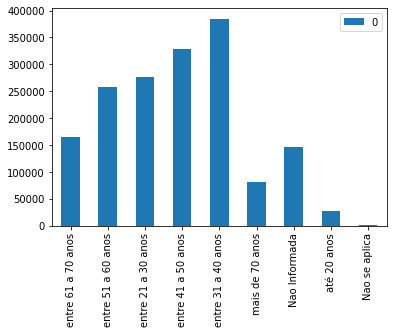

In [34]:
from collections import Counter
age_counter = Counter(df['FaixaEtariaConsumidor'])
df = pd.DataFrame.from_dict(age_counter, orient='index')
df.plot(kind='bar')

In [35]:
dfceps = pd.read_csv("../data/ceps.csv", header=0, encoding="UTF-8", delimiter="\t", dtype="str")

In [36]:
view_df_stats(dfceps)

Shape of df=(732763, 5)
Number of index levels:1
For index level 0,unique values count=732763
Columns of df=Index(['CEP', 'cidadeEstado', 'bairro', 'rua', 'complemento'], dtype='object')
Null count= 
 CEP                  0
cidadeEstado         0
bairro           12018
rua              10040
complemento     706454
dtype: int64
             CEP  cidadeEstado  bairro                  rua  \
count     732763        732763  720745               722723   
unique    732763         10443   18931               507668   
top     06618010  São Paulo/SP  Centro  Rua Principal, s/n    
freq           1         57175   31391                 1087   

                     complemento  
count                      26309  
unique                     24193  
top      Caixa Econômica Federal  
freq                          35  


A tabela unificada que foi criada através da base dos CEPs foi gerada com as cidades e UFs na mesma colunas
separadas por '/' foi necessário separar ambos e inserir em 2 colunas separadas para simplificar as análises

In [37]:
dfceps.cidadeEstado.str.split("/", expand=True)

,0,1
0,São Paulo,SP
1,São Paulo,SP
2,São Paulo,SP
3,São Paulo,SP
4,São Paulo,SP
...,...,...
732758,São João Bosco (Ciríaco),RS - Distrito
732759,Cruzaltinha (Ciríaco),RS - Distrito
732760,David Canabarro,RS
732761,David Canabarro,RS


In [38]:
dfceps[['cidade','estado']] = dfceps.cidadeEstado.str.split("/", expand=True)

In [39]:
dfceps['estado'].unique()

array(['SP', 'SP  - Distrito', 'SP  - Povoado', 'RJ', 'RJ  - Distrito',
       'RJ  - Povoado', 'ES', 'ES  - Distrito', 'ES  - Povoado', 'MG',
       'MG  - Distrito', 'MG  - Povoado', 'BA', 'BA  - Distrito',
       'BA  - Povoado', 'SE', 'SE  - Distrito', 'PE', 'PE  - Povoado',
       'PE  - Distrito', 'AL', 'AL  - Povoado', 'AL  - Distrito', 'PB',
       'PB  - Distrito', 'PB  - Povoado', 'RN', 'RN  - Distrito',
       'RN  - Povoado', 'CE', 'CE  - Distrito', 'CE  - Povoado', 'PI',
       'PI  - Povoado', 'MA', 'MA  - Distrito', 'MA  - Povoado', 'PA',
       'PA  - Distrito', 'PA  - Povoado', 'AP', 'AP  - Povoado',
       'AP  - Distrito', 'AM', 'AM  - Distrito', 'AM  - Povoado', 'RR',
       'RR  - Distrito', 'AC', 'AC  - Distrito', 'DF', 'GO',
       'GO  - Distrito', 'GO  - Povoado', 'RO', 'RO  - Distrito',
       'RO  - Povoado', 'TO', 'TO  - Distrito', 'TO  - Povoado', 'MT',
       'MT  - Povoado', 'MT  - Distrito', 'MS', 'MS  - Distrito', 'PR',
       'PR  - Povoado', 'PR  - Di

Algumas UFs estão constatando como "- Povoado" e "- Distrito",
sendo necessária a remoção desses dados para a unificação das UFs

In [40]:
dfceps['estado'] = dfceps['estado'].str.replace("  - Povoado","")
dfceps['estado'] = dfceps['estado'].str.replace("  - Distrito","")
dfceps['estado'].unique()

array(['SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB', 'RN', 'CE',
       'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'PR', 'SC', 'RS'], dtype=object)

In [41]:
dfceps.head()

,CEP,cidadeEstado,bairro,rua,complemento,cidade,estado
0,01001000,São Paulo/SP,Sé,Praça da Sé - lado ímpar,NaN,São Paulo,SP
1,01001001,São Paulo/SP,Sé,Praça da Sé - lado par,NaN,São Paulo,SP
2,01001010,São Paulo/SP,Sé,Rua Filipe de Oliveira,NaN,São Paulo,SP
3,01001900,São Paulo/SP,Sé,"Praça da Sé, 108",UNESP - Universidade Estadual Júlio de Mesquita Filho,São Paulo,SP
4,01001901,São Paulo/SP,Sé,"Praça da Sé, 371",Edifício Santa Lídia,São Paulo,SP


In [42]:
# merged = pd.merge(df3,dfceps,left_on="CEPConsumidor", right_on="CEP", indicator=True, how='outer')
# pd.Series(merged[merged['_merge'] == 'left_only']['CEPConsumidor'].replace("-","").unique()).to_csv('ceps_not_founded_on_public_ceps.csv', index=False)
# dfMerged = pd.read_csv("uniqueCEPs.csv")
# dfMerged

# import requests
#
# row_list = []
# for row in dfMerged['CEPConsumidor'][:100]:
#     try:
#         r = requests.get("https://viacep.com.br/ws/" + row + "/json/")
#         rjson = r.json()
#         if 'erro' not in rjson:
#             row_list.append(
#                 {"CEP": rjson['cep'].replace("-",""),
#                 "cidadeEstado": rjson['localidade'] + '/' + rjson['uf'],
#                  "bairro": rjson['bairro'],
#                  "rua": rjson['logradouro'],
#                  "complemento": rjson['complemento'],
#                  "cidade": rjson['localidade'],
#                  "estado": rjson['uf']
#                  }
#             )
#     except requests.exceptions.HTTPError as e:
#         print("Http error")
#         print(e)
#     except requests.exceptions.ConnectionError as e:
#         print("connection problem")
#         print(e)
#         break
#     except Exception as e:
#         print("Other Exception")
#         print(e)

# df4 = pd.DataFrame(row_list, columns=['CEP','cidadeEstado','bairro','rua','complemento','cidade','estado'])
# df4.to_csv('cepsFaltante.csv')
# df4.drop_duplicates()
# df5 = pd.concat([df4, dfceps])
# df5.show()
# df5.to_csv("cepsJuntados.csv")


https://www.kaggle.com/wfoliveira/ceps-brasil-201805

In [43]:
df6 = pd.read_csv("../data/tbl_cep_201805_csv.csv",header=0,encoding="ISO-8859-9",delimiter=",", dtype="str")
df6

,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
0,01001000,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado ímpar,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado impar,NaN,-23.5502784,-46.6342179,3550308,1521.110,11,S
1,01001001,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado par,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado par,NaN,-23.549865,-46.6340205,3550308,1521.110,11,S
2,01001010,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Sé,São Paulo,SP,NaN,NaN,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Se,Sao Paulo,NaN,NaN,-23.5514794,-46.6332722,3550308,1521.110,11,S
3,01001900,Praça,"da Sé, 108","Praça da Sé, 108",Sé,São Paulo,SP,NaN,UNESP - Universidade Estadual Júlio de Mesquita Filho,Praca,"da Se, 108","Praca da Se, 108",Se,Sao Paulo,NaN,UNESP - Universidade Estadual Julio de Mesquita Filho,-23.5498956,-46.6343784,3550308,1521.110,11,S
4,01001901,Praça,"da Sé, 371","Praça da Sé, 371",Sé,São Paulo,SP,NaN,Edifício Santa Lídia,Praca,"da Se, 371","Praca da Se, 371",Se,Sao Paulo,NaN,Edificio Santa Lidia,-23.5518286,-46.634234,3550308,1521.110,11,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108500,99980000,NaN,NaN,NaN,NaN,David Canabarro,RS,NaN,NaN,NaN,NaN,NaN,NaN,David Canabarro,NaN,NaN,-28.4114183,-51.8311441,4306304,174.939,54,S
1108501,99980970,Rua,"Adelino Gazzoni, 160","Rua Adelino Gazzoni, 160",Centro,David Canabarro,RS,NaN,NaN,Rua,"Adelino Gazzoni, 160","Rua Adelino Gazzoni, 160",Centro,David Canabarro,NaN,NaN,-28.3876712,-51.8467877,4306304,174.939,54,S
1108502,99980974,Distrito,"Capela São José do Capingui, s/n","Distrito Capela São José do Capingui, s/n",Capela São José do Capingui (Distrito),David Canabarro,RS,NaN,NaN,Distrito,"Capela Sao Jose do Capingui, s/n","Distrito Capela Sao Jose do Capingui, s/n",Capela Sao Jose do Capingui (Distrito),David Canabarro,NaN,NaN,-28.4513555,-51.8807142,4306304,174.939,54,S
1108503,99990000,NaN,NaN,NaN,NaN,Muliterno,RS,NaN,NaN,NaN,NaN,NaN,NaN,Muliterno,NaN,NaN,-28.3439126,-51.7466948,4312625,111.132,54,S


In [44]:
joinDF = pd.merge(df3,df6,left_on="CEPConsumidor", right_on="cep")

In [45]:
view_df_stats(joinDF)


Shape of df=(1349072, 46)
Number of index levels:1
For index level 0,unique values count=1349072
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'radicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'RadicalCNPJ', 'cep', 'tipo', 'nome_logradouro', 'logradouro', 'bairro',
       'cidade', 'estado', 'complemento', 'grandes_usuarios',
       'tipo_sem_acento', 'nome_logradouro_sem_acento',
       'logradouro_sem_acento', 'bairro_sem_acento', 'cidade_sem_acento',
       'complemento_sem_acento', 'grandes_usuarios_sem_acento', 'latitude',
       'longitude', 'cidade_ibge', 'cidade_area', 'ddd', 'cep_ativo'],
      dtype='object')
Null count= 
 AnoCalenda

In [46]:
joinDF

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,radicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,RadicalCNPJ,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,CBP SUL COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1350934000116,1350934,CBP SUL - COLCHOES E ESPUMAS INDUSTRIAIS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330,NaN,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S
1,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,NETUNO INDÚSTRIA E COMÉRCIO LTDA,NETUNO,1,1673680000258,1673680,NETUNO INDUSTRIA E COMERCIO LTDA,NaN,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330,NaN,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S
2,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,Centro-oeste,GO,COMERCIO DE COLCHÕES LTDA,NaN,1,06537671000172,NaN,MX COMERCIO DE COLCHOES LTDA,ORTOBOM,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,S,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,06537671,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S
3,2010,2009-10-15 17:32:18.000,2009-07-29 15:46:10.000,05,Centro-oeste,GO,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA,TELEFONE CELULAR,1,04667337000108,NaN,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA.,NaN,4652400,COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS E EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO,S,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,04667337,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S
4,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,Centro-oeste,GO,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,(ORTOBOM FABRICA),1,02748383000297,NaN,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,02748383,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349067,2018,2018-12-18 14:40:04.000,2018-11-23 08:42:47.000,3,Sudeste,MG,VIA VAREJO SA,"PONTO FRIO, CASAS BAHIA E BARTIRA",1,33041260065290,NaN,VIA VAREJO S/A,NaN,4753900,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉSTICOS E EQUIPAMENTOS DE ÁUDIO E VÍDEO,S,124,Móveis (outros),NaN,NaN,F,entre 41 a

Após a união da base de CEPs com a base do PROCON utilizando um inner join, foi constatado que alguns CEPs não constam na base coletada,
gerando uma base final com 1.349.072 linhas e 41 colunas.


Será necessário avaliar outras bases de CEPs para que não haja a perda de 198.900 registros, sendo 12,85% da base.

## Árvores de Decisão

Todo o planejamento e passo a passo

Calcular a entropia.
Calcular o ganho.

Quais a variaveis usadas.
Como foi feito o calculo.
Como foi feita a árvore de decisão.
Como foi aplicado (código).
Mostrar a árvore gerada.


Cálculo da entropia:

![alt text](https://miro.medium.com/max/391/1*nNY_7_aWRwp8E2DyGduEPg.png)

In [47]:
import numpy as np
from math import e
import pandas as pd

""" Usage: pandas_entropy(df['column1']) """

def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

Pegar uma coluna, e verificar o valor se é positivo ou negativo da segunda coluna, separando os valores da primeira coluna

In [48]:
joinDF[['CodigoAssunto','Atendida']]

,CodigoAssunto,Atendida
0,100,S
1,100,S
2,100,S
3,101,S
4,100,S
...,...,...
1349067,124,S
1349068,124,S
1349069,199,N
1349070,95,N


In [49]:
sizeDF = len(joinDF)
sizeDF

1349072

In [50]:
map = {}

for index, row in joinDF[['CodigoAssunto','Atendida']].iterrows():
    if row["CodigoAssunto"] in map:
        map[str(row["CodigoAssunto"])][row["Atendida"]] = map.get(row["CodigoAssunto"])[row["Atendida"]] + 1
    else:
        map[row["CodigoAssunto"]] = {"S": 0, "N": 0}

Entropy calculation by CodigoAssunto and Atendida.

In [51]:
import math

sum = 0
for key in map:
    totalValues = map[key]["S"] + map[key]["N"]
    if totalValues == 0:
        positive = 0
        negative = 0
    else:
        positive = map[key]["S"]/totalValues
        negative = map[key]["N"]/totalValues

    if positive == 0:
        positiveSide = 0
    else:
        positiveSide = (positive * math.log2(positive))

    if negative == 0:
        negativeSide = 0
    else:
        negativeSide = (negative * math.log2(negative))

    map[key]["entropy"] = (- positiveSide - negativeSide)

# map

{'100': {'S': 6051, 'N': 3283, 'entropy': 0.9355990900995794},
 '101': {'S': 103338, 'N': 52278, 'entropy': 0.9208827535947319},
 '92': {'S': 20166, 'N': 6554, 'entropy': 0.8037182137547063},
 '132': {'S': 5503, 'N': 3692, 'entropy': 0.9718342741182591},
 '90': {'S': 5268, 'N': 2443, 'entropy': 0.9008898848087006},
 '224': {'S': 8, 'N': 13, 'entropy': 0.9587118829771318},
 '53': {'S': 39434, 'N': 33649, 'entropy': 0.9954754752248973},
 '186': {'S': 55175, 'N': 20486, 'entropy': 0.8425535978870041},
 '54': {'S': 44794, 'N': 30914, 'entropy': 0.97561632350432},
 '98': {'S': 1085, 'N': 612, 'entropy': 0.9432101955161749},
 '74': {'S': 2657, 'N': 1378, 'entropy': 0.9262580254083175},
 '187': {'S': 61652, 'N': 27799, 'entropy': 0.8940643099549981},
 '183': {'S': 13140, 'N': 5232, 'entropy': 0.8618840020081571},
 '185': {'S': 16119, 'N': 11243, 'entropy': 0.976969765857385},
 '102': {'S': 60280, 'N': 27348, 'entropy': 0.8955736009931463},
 '145': {'S': 2406, 'N': 3078, 'entropy': 0.989141239

In [52]:
entropy = 0
for key in map:
    totalValues = map[key]["S"] + map[key]["N"]
    if totalValues == 0:
        positive = 0
        negative = 0
    entropy += (totalValues/sizeDF)*map[key]["entropy"]

entropy

0.9197577474461013

O calculo da entropia relacionada ao código do erro com o fato de o problema ser ou não resolvida é de
0.9241 sendo um ótimo voluntário para definir a raiz da árvore de decisão

In [53]:
import math

def calcEntropyAtendida(column):
    entropy = 0
    map = {}
    newDF = joinDF.dropna(subset=[column])
    for index, row in newDF[[column,'Atendida']].iterrows():
        if row[column] in map:
            map[str(row[column])][row["Atendida"]] = map.get(row[column])[row["Atendida"]] + 1
        else:
            map[row[column]] = {"S": 0, "N": 0}
    for key in map:
        totalValues = map[key]["S"] + map[key]["N"]
        if totalValues == 0:
            positive = 0
            negative = 0
        else:
            positive = map[key]["S"]/totalValues
            negative = map[key]["N"]/totalValues

        if positive == 0:
            positiveSide = 0
        else:
            positiveSide = (positive * math.log2(positive))

        if negative == 0:
            negativeSide = 0
        else:
            negativeSide = (negative * math.log2(negative))

        map[key]["entropy"] = (- positiveSide - negativeSide)
        entropy += (totalValues/sizeDF)*map[key]["entropy"]

    return entropy

In [54]:
entropySex = calcEntropyAtendida("SexoConsumidor")
entropySex

0.9504611039020859

In [55]:
entropyAge = calcEntropyAtendida("FaixaEtariaConsumidor")
entropyAge

0.952786488469405

In [56]:
entropyCodigoProblema = calcEntropyAtendida("CodigoProblema")
entropyCodigoProblema

0.9063807178318728

In [57]:
entropyCodigoAssunto = calcEntropyAtendida("CodigoAssunto")
entropyCodigoAssunto

0.9197577474461013

In [58]:
entropyCodigoAssunto = calcEntropyAtendida("Regiao")
entropyCodigoAssunto


0.9457632067157704

In [59]:
entropyCidade = calcEntropyAtendida("cidade")
entropyCidade

0.8989560608341732

To use the cities as an variable for the neural algorithm it's needed to change his value for a numeric, so a class will be created for every city.

In [60]:
len(joinDF['cidade'].unique())

3852

In [61]:
cities_numeric = {}
unique_cities = joinDF['cidade'].unique()
for i in range(len(joinDF['cidade'].unique())):
    cities_numeric[unique_cities[i]] = i

# cities_numeric

In [62]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

decisionTreeDF = joinDF
decisionTreeDF = decisionTreeDF.dropna(subset=['SexoConsumidor', 'FaixaEtariaConsumidor', 'Regiao', 'CodigoProblema', 'CodigoAssunto'])
decisionTreeDF['Atendida'] = decisionTreeDF['Atendida'].str.replace("S","1")
decisionTreeDF['Atendida'] = decisionTreeDF['Atendida'].str.replace("F","0")
decisionTreeDF['Atendida'] = decisionTreeDF['Atendida'].str.replace("N","0")
decisionTreeDF['SexoConsumidor'] = decisionTreeDF['SexoConsumidor'].str.replace("F","0")
decisionTreeDF['SexoConsumidor'] = decisionTreeDF['SexoConsumidor'].str.replace("M","1")
decisionTreeDF['SexoConsumidor'] = decisionTreeDF['SexoConsumidor'].str.replace("N","2")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("entre 61 a 70 anos","0")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("entre 21 a 30 anos","1")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("entre 41 a 50 anos","2")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("entre 31 a 40 anos","3")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("Nao Informada","4")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("mais de 70 anos","5")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("até 20 anos","6")
decisionTreeDF['FaixaEtariaConsumidor'] = decisionTreeDF['FaixaEtariaConsumidor'].str.replace("entre 51 a 60 anos","7")
decisionTreeDF['Regiao'] = decisionTreeDF['Regiao'].str.replace("Sul","0")
decisionTreeDF['Regiao'] = decisionTreeDF['Regiao'].str.replace("Sudeste","1")
decisionTreeDF['Regiao'] = decisionTreeDF['Regiao'].str.replace("Norte","2")
decisionTreeDF['Regiao'] = decisionTreeDF['Regiao'].str.replace("Nordeste","3")
decisionTreeDF['Regiao'] = decisionTreeDF['Regiao'].str.replace("Centro-oeste","4")
print(decisionTreeDF['Atendida'].unique())
print(decisionTreeDF['SexoConsumidor'].unique())
print(decisionTreeDF['FaixaEtariaConsumidor'].unique())
print(decisionTreeDF['Regiao'].unique())

<ipython-input-62-c4d01e3c886f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decisionTreeDF['Atendida'] = decisionTreeDF['Atendida'].str.replace("S","1")
<ipython-input-62-c4d01e3c886f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decisionTreeDF['Atendida'] = decisionTreeDF['Atendida'].str.replace("F","0")
<ipython-input-62-c4d01e3c886f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

['1' '0']
['1' '0' '2']
['0' '7' '1' '2' '3' '4' '5' '6']
['4' '1' '2' '0' '3']


In [63]:
def class_cities(row):
    return cities_numeric[row.cidade]

In [64]:
decisionTreeDF['codigo_cidade'] = decisionTreeDF.apply(class_cities, axis=1)


<ipython-input-64-e388ab18334d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decisionTreeDF['codigo_cidade'] = decisionTreeDF.apply(class_cities, axis=1)


In [65]:
decisionTreeDF

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,radicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,RadicalCNPJ,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo,codigo_cidade
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,4,GO,CBP SUL COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1350934000116,1350934,CBP SUL - COLCHOES E ESPUMAS INDUSTRIAIS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,1,100,Colchão,105,Produto entregue com danos/defeitos,1,0,74680330,NaN,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S,0
1,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,4,GO,NETUNO INDÚSTRIA E COMÉRCIO LTDA,NETUNO,1,1673680000258,1673680,NETUNO INDUSTRIA E COMERCIO LTDA,NaN,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,1,100,Colchão,105,Produto entregue com danos/defeitos,1,0,74680330,NaN,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S,0
2,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,4,GO,COMERCIO DE COLCHÕES LTDA,NaN,1,06537671000172,NaN,MX COMERCIO DE COLCHOES LTDA,ORTOBOM,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,1,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",0,7,74680330,06537671,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S,0
3,2010,2009-10-15 17:32:18.000,2009-07-29 15:46:10.000,05,4,GO,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA,TELEFONE CELULAR,1,04667337000108,NaN,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA.,NaN,4652400,COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS E EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO,1,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",102,"Garantia (Abrangência, cobertura, etc.)",0,7,74680330,04667337,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S,0
4,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,4,GO,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,(ORTOBOM FABRICA),1,02748383000297,NaN,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,1,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",0,7,74680330,02748383,74680330,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiânia,GO,NaN,NaN,Alameda,das Mangubas,Alameda das Mangubas,Residencial Aldeia do Vale,Goiania,NaN,NaN,-16.610696,-49.2000968,5208707,728.841,62,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347422,2017,2017-11-07 11:06:35.000,2017-10-05 14:21:11.000,01,2,RO,BANCO PAN SA,PAN,1,59285411000113,NaN,BANCO PANAMERICANO SA,NaN,6422100,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",0,53,Banco comercial,1222,Calculo de prestação em atraso,1,3,76820228,59285411,76820228,Rua,Renato Perez,Rua Renato Perez,Agenor de Carvalho,Porto Velho,RO,(Jd das Mangueiras I) até 1035/1036,NaN,Rua,Renato Perez,Rua Renato Per

In [66]:
contagem_classes = Counter(joinDF['Atendida'])
print(contagem_classes)


Counter({'S': 843197, 'N': 505875})


In [67]:
feature_cols = ['CodigoProblema', 'CodigoAssunto', 'CEPConsumidor']
X = decisionTreeDF[feature_cols] # Features
y = decisionTreeDF.Atendida # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6847858820695055


Using SMOTE

In [68]:
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.692


In [69]:
# from sklearn.tree import export_graphviz
# from six import StringIO
# from IPython.display import Image
# import pydotplus
#
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#

In [70]:
# graph.write_png('tree4DepthFullAttr.png')
# Image(graph.create_png())

Análise Descritiva da colunas

In [75]:
joinDF['CodigoAssunto'].value_counts()
joinDF['CodigoAssunto'].value_counts(normalize=True) * 100
frequencia = joinDF['CodigoAssunto'].value_counts()
percentual = joinDF['CodigoAssunto'].value_counts(normalize=True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem %': percentual})
dist_freq_qualitativas.rename_axis('Código Assunto', axis='columns', inplace=True)
dist_freq_qualitativas.to_markdown()

'|     |   Frequência |   Porcentagem % |\n|----:|-------------:|----------------:|\n| 101 |       155617 |    11.5351      |\n| 187 |        89452 |     6.63063     |\n| 102 |        87629 |     6.4955      |\n|  54 |        75709 |     5.61193     |\n| 186 |        75662 |     5.60845     |\n|  53 |        73084 |     5.41735     |\n|  96 |        50394 |     3.73546     |\n|  63 |        47449 |     3.51716     |\n|  94 |        42445 |     3.14624     |\n|  76 |        35405 |     2.6244      |\n| 259 |        30295 |     2.24562     |\n| 185 |        27363 |     2.02828     |\n|  92 |        26721 |     1.98069     |\n| 279 |        20556 |     1.52371     |\n| 122 |        19000 |     1.40838     |\n| 183 |        18373 |     1.3619      |\n|  55 |        16459 |     1.22002     |\n|  93 |        16296 |     1.20794     |\n| 233 |        15845 |     1.17451     |\n|  82 |        14908 |     1.10506     |\n| 276 |        14166 |     1.05006     |\n| 140 |        13425 |     0.9951

In [77]:
joinDF['CodigoProblema'].value_counts()
joinDF['CodigoProblema'].value_counts(normalize=True) * 100
frequencia = joinDF['CodigoProblema'].value_counts()
percentual = joinDF['CodigoProblema'].value_counts(normalize=True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem %': percentual})
dist_freq_qualitativas.rename_axis('CodigoProblema Assunto', axis='columns', inplace=True)
dist_freq_qualitativas


CodigoProblema Assunto,Frequência,Porcentagem %
105,252041,18.961743
102,164576,12.381508
28,128871,9.695322
134,117889,8.869116
107,66451,4.999293
...,...,...
4817,1,0.000075
1882,1,0.000075
5566,1,0.000075
2943,1,0.000075


In [78]:
joinDF['CEPConsumidor'].value_counts()
joinDF['CEPConsumidor'].value_counts(normalize=True) * 100
frequencia = joinDF['CEPConsumidor'].value_counts()
percentual = joinDF['CEPConsumidor'].value_counts(normalize=True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem %': percentual})
dist_freq_qualitativas.rename_axis('CEP', axis='columns', inplace=True)
dist_freq_qualitativas

CEP,Frequência,Porcentagem %
75690000,6205,0.459946
78455000,4643,0.344163
78580000,4062,0.301096
68515000,4007,0.297019
89120000,3853,0.285604
...,...,...
64028535,1,0.000074
55008231,1,0.000074
53413835,1,0.000074
72130420,1,0.000074


In [79]:
joinDF['cidade'].value_counts()
joinDF['cidade'].value_counts(normalize=True) * 100
frequencia = joinDF['cidade'].value_counts()
percentual = joinDF['cidade'].value_counts(normalize=True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem %': percentual})
dist_freq_qualitativas.rename_axis('Cidade', axis='columns', inplace=True)
dist_freq_qualitativas

Cidade,Frequência,Porcentagem %
São Paulo,151812,11.253069
Salvador,104229,7.725978
Campo Grande,57526,4.264116
Recife,47367,3.511080
Rio de Janeiro,45947,3.405823
...,...,...
Jati,1,0.000074
Sátiro Dias,1,0.000074
Romaria,1,0.000074
Carrancas,1,0.000074
